In [1]:
import pandas as pd
import pandahouse as ph
import seaborn as sns
import matplotlib.dates as mdates

import telegram
import io

import matplotlib.pyplot as plt
%matplotlib inline

connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'simulator_20220720',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

bot = telegram.Bot(token = '5556378163:AAF2Pd7mB5mGSLcP12sFeYuX21UfzoWj6PM')

my_chat_id = 149956060
my_bot_id = 5058001314
reports_chat_id = -770113521

In [2]:
# top-15 viewed posts for the last 7 days

query = '''
SELECT post_id AS post_id,
       countIf(action='view') AS views,
       countIf(action='like') AS likes,
       countIf(action='like') / countIf(action='view') AS "CTR",
       count(DISTINCT user_id) AS "unique users"
FROM simulator_20220720.feed_actions
where toDate(time) between  today() -7 and today() - 1
GROUP BY post_id
ORDER BY views DESC
LIMIT 15;
'''

top_posts = ph.read_clickhouse(query, connection=connection)

In [3]:
top_posts.CTR = top_posts.CTR.round(3)
top_posts.index += 1

In [4]:
top_posts

,post_id,views,likes,CTR,unique users
1,5938,68950,19990,0.290,43275
2,5894,60881,17312,0.284,39754
3,5926,58933,16261,0.276,38829
4,5773,58781,16095,0.274,37759
5,5890,55384,15168,0.274,36906
6,6103,54509,16010,0.294,35499
7,5793,53724,14755,0.275,34863
8,5788,52251,13951,0.267,34247
9,6208,49555,14552,0.294,31419
10,5899,49487,12861,0.260,34292


In [5]:

query_1 = '''
SELECT * FROM 
(SELECT toDate(time) AS day,
      count(action) as all_actions,
      countIf(action='view') AS views,
      countIf(action='like') AS likes,
      countIf(action='like') / countIf(action='view') AS "CTR",
      count(DISTINCT user_id) AS unique_users_feed,
      count(DISTINCT post_id) as viewed_posts
FROM simulator_20220720.feed_actions 
where toDate(time) between today() -30 and today() - 1
GROUP BY toDate(time)) f 
FULL JOIN 
(SELECT toDate(time) AS day,
        count(user_id) as messages,
        count(DISTINCT user_id) AS unique_users_mess
FROM simulator_20220720.message_actions
where toDate(time) between today() -30 and today() - 1
GROUP BY toDate(time)) m USING day
'''

data = ph.read_clickhouse(query_1, connection=connection)

In [6]:
data

,day,all_actions,views,likes,CTR,unique_users_feed,viewed_posts,messages,unique_users_mess
0,2022-07-13,811832,675874,135958,0.201159,19211,202,12901,2476
1,2022-07-14,696730,583467,113263,0.194121,20316,199,12899,1739
2,2022-07-15,623345,522682,100663,0.192589,20187,183,12901,1662
3,2022-07-16,600943,502954,97989,0.194827,20584,165,12899,2540
4,2022-07-17,707076,583300,123776,0.212200,20322,186,12900,1823
5,2022-07-18,829554,682456,147098,0.215542,19838,184,12900,1736
6,2022-07-19,808277,662836,145441,0.219422,19540,175,12900,2639
7,2022-07-20,804496,660814,143682,0.217432,19702,168,32259,3747
8,2022-07-21,710093,589754,120339,0.204049,19717,169,12879,2712
9,2022-07-22,563576,471127,92449,0.196229,19741,166,12900,1878


In [7]:
query_2 = '''
SELECT day AS day,
              action AS action,
              AVG(actions) AS avg_actions
FROM
  (select toDate(time) as day,
          user_id,
          action,
          count(action) as actions
  FROM simulator_20220720.feed_actions
  where toDate(time) between today() -30 and today() - 1
  group by day, user_id, action
UNION ALL select toDate(time) as day,
          user_id,
          'message' as action,
          count(user_id) as actions
  FROM simulator_20220720.message_actions
  where toDate(time) between today() -30 and today() - 1
  group by day, user_id, action)
GROUP BY day, action
ORDER BY day, action
'''

actions = ph.read_clickhouse(query_2, connection=connection)

In [8]:
actions = actions.pivot(index='day', columns='action', values='avg_actions').reset_index() \
                .rename(columns={'like':'likes_per_user','message':'messages_per_user','view':'views_per_user'})
actions

action,day,likes_per_user,messages_per_user,views_per_user
0,2022-07-13,7.204218,5.210420,35.181615
1,2022-07-14,5.842515,7.417481,28.720994
2,2022-07-15,5.228432,7.762335,25.892010
3,2022-07-16,5.003523,5.078346,24.434221
4,2022-07-17,6.261116,7.076248,28.702884
5,2022-07-18,7.543487,7.430876,34.401452
6,2022-07-19,7.566382,4.888215,33.922006
7,2022-07-20,7.410873,8.609287,33.540453
8,2022-07-21,6.274192,4.748894,29.910940
9,2022-07-22,4.931402,6.869010,23.865407


In [9]:
report = f'''Newsfeed & Messenger\nreport for {data.iloc[-1,:].day.strftime('%d-%m-%Y')}: \n 
DAU feed: {data.iloc[-1,5]} 
Views & Likes: {data.iloc[-1,1]}
Views per user:{int(actions.iloc[-1,-1])}
Likes per user:{int(actions.iloc[-1,1])}
Viewed posts: {data.iloc[-1,6]}\n
DAU messenger: {data.iloc[-1,-1]}
Messages: {data.iloc[-1,-2]}
Messages per user:{int(actions.iloc[-1,-2])}\n
'''
print(report)

Newsfeed & Messenger
report for 11-08-2022: 
 
DAU feed: 19388 
Views & Likes: 847786
Views per user:35
Likes per user:7
Viewed posts: 199

DAU messenger: 3215
Messages: 12899
Messages per user:4




0

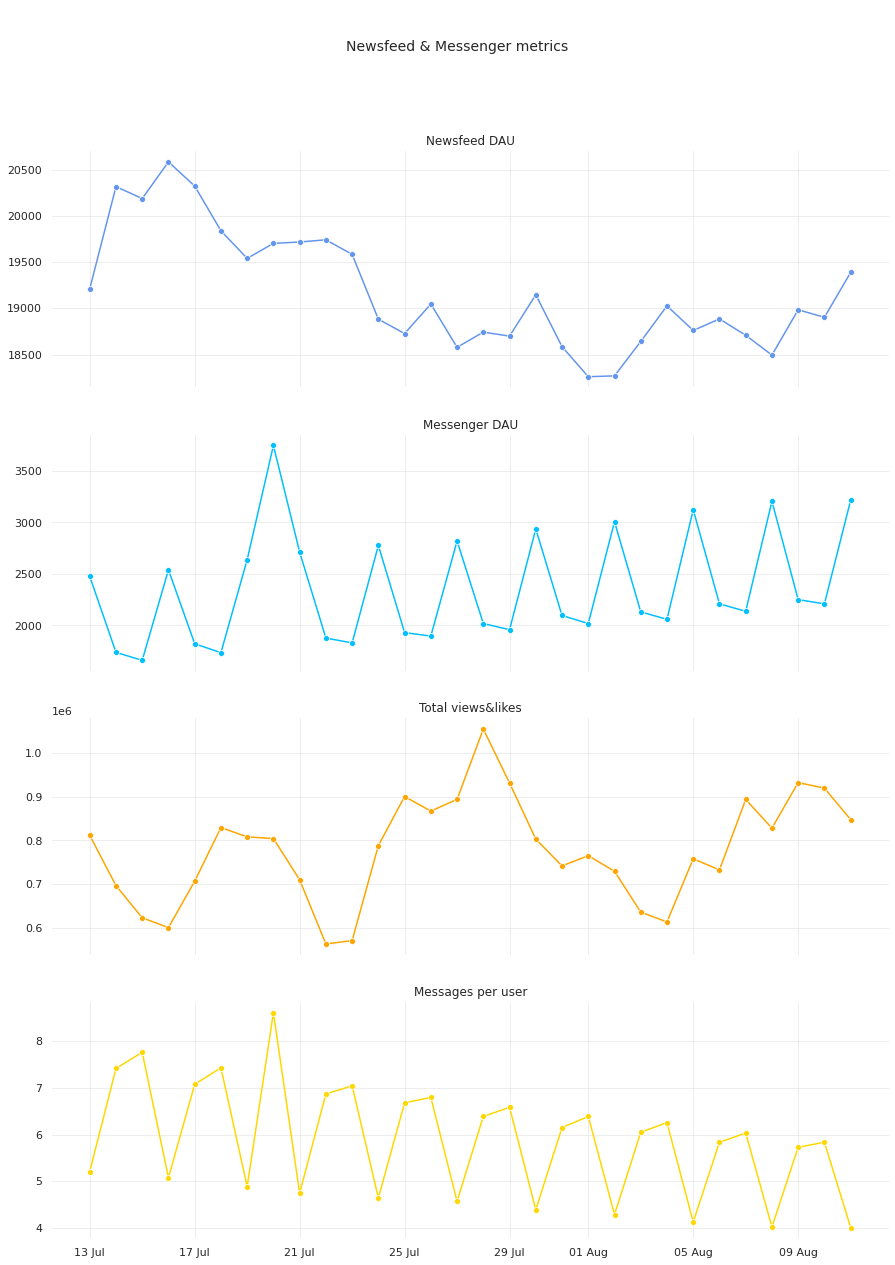

In [10]:
sns.set(font_scale=1,
       style="whitegrid",
       rc={'figure.figsize':(15,20)})

fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True)


sns.lineplot(x='day', y='unique_users_feed', data = data, ax = axes[0], color = 'cornflowerblue', marker="o")
sns.lineplot(x='day', y='unique_users_mess', data = data, ax = axes[1], color = 'deepskyblue', marker="o")
sns.lineplot(x='day', y='all_actions', data = data, ax = axes[2], color = 'orange', marker="o")
sns.lineplot(x='day', y='messages_per_user', data = actions, ax = axes[3], color = 'gold', marker="o")


for name, ax in zip(['Newsfeed DAU','Messenger DAU','Total views&likes','Messages per user'], axes.flatten()):
    ax.set_frame_on(False)
    ax.grid(True, color='#e2e2e2', alpha=0.6)
    ax.set(title = name, ylabel='')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
    
ax.set_xlabel('\n')

fig.suptitle('\n\nNewsfeed & Messenger metrics', fontsize=14)

plot_object = io.BytesIO()
plt.savefig(plot_object)
plot_object.name = 'newsfeed_messenger_metrics.png'
plot_object.seek(0)

# plt.close()

In [11]:
top_posts

,post_id,views,likes,CTR,unique users
1,5938,68950,19990,0.290,43275
2,5894,60881,17312,0.284,39754
3,5926,58933,16261,0.276,38829
4,5773,58781,16095,0.274,37759
5,5890,55384,15168,0.274,36906
6,6103,54509,16010,0.294,35499
7,5793,53724,14755,0.275,34863
8,5788,52251,13951,0.267,34247
9,6208,49555,14552,0.294,31419
10,5899,49487,12861,0.260,34292


In [12]:
file_object = io.StringIO()
top_posts.to_csv(file_object)
file_object.seek(0)
# file_object.name = 'top-15 viewed posts for the last 7 days.csv'


0

In [13]:
bot.sendMessage(chat_id = my_chat_id, text=report)
bot.sendPhoto(chat_id = my_chat_id, photo = plot_object)
bot.sendDocument(chat_id = my_chat_id, document = file_object, filename = 'top-15 viewed posts for the last 7 days.csv')